<a href="https://colab.research.google.com/github/AbdullahAlTalaq/About-Me/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We Used ChatGpt and https://datafiction.github.io/docs/ml/Clustering/Comparison/Comparison/#data





In [ ]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from itertools import cycle
from time import time
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch, MiniBatchKMeans


In [ ]:
data = pd.read_csv('dataset_cybersecurity_michelle.csv')

data = data[['qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_tilde_directory', 'qty_comma_directory',
       'qty_hashtag_directory', 'qty_dot_file', 'qty_slash_file',
       'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
       'qty_and_file', 'qty_exclamation_file', 'qty_tilde_file',
       'qty_comma_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_tilde_params', 'qty_hashtag_params', 'tld_present_params',
       'email_in_url', 'time_domain_activation','phishing']]  # Adjust the column name if needed
# Separate the features from the target variable (if applicable)
X = data.drop('phishing', axis=1)  # Adjust the column name if needed
y = data['phishing']

In [ ]:
X.describe

<bound method NDFrame.describe of         qty_slash_directory  qty_questionmark_directory  qty_equal_directory  \
0                         1                           0                    0   
1                         2                           0                    0   
2                        -1                          -1                   -1   
3                         2                           0                    0   
4                        -1                          -1                   -1   
...                     ...                         ...                  ...   
129693                   -1                          -1                   -1   
129694                   -1                          -1                   -1   
129695                    5                           0                    0   
129696                    1                           0                    0   
129697                   -1                          -1                   -1   

        qty_tilde_directory  qty_comma_directory  qty_hashtag_directory  \
0                         0                    0                      0   
1                         0                    0                      0   
2                        -1                   -1                     -1   
3                         0                    0                      0   
4                        -1                   -1                     -1   
...                     ...                  ...                    ...   
129693                   -1                   -1                     -1   
129694                   -1                   -1                     -1   
129695                    0                    0                      0   
129696                    0                    0                      0   
129697                   -1                   -1                     -1   

        qty_dot_file  qty_slash_file  qty_questionmark_file  qty_equal_file  \
0                  0               0                      0               0   
1                  0               0                      0               0   
2                 -1              -1                     -1              -1   
3                  0               0                      0               0   
4                 -1              -1                     -1              -1   
...              ...             ...                    ...             ...   
129693            -1              -1                     -1              -1   
129694            -1              -1                     -1              -1   
129695             1               0                      0               0   
129696             0               0                      0               0   
129697            -1              -1                     -1              -1   

        ...  qty_exclamation_file  qty_tilde_file  qty_comma_file  \
0       ...                     0               0               0   
1       ...                     0               0               0   
2       ...                    -1              -1              -1   
3       ...                     0               0               0   
4       ...                    -1              -1              -1   
...     ...                   ...             ...             ...   
129693  ...                    -1              -1              -1   
129694  ...                    -1              -1              -1   
129695  ...                     0               0               0   
129696  ...                     0               0               0   
129697  ...                    -1              -1              -1   

        qty_hashtag_file  qty_dollar_file  qty_tilde_params  \
0                      0                0                -1   
1                      0                0                -1   
2                     -1               -1                -1   
3                      0                0                -1   
4          

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
import numpy as np
column_names = X.columns

# Scale the input features to non-negative values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create SelectKBest object with the desired number of features
k_features = 22  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k_features)

# Apply feature selection to the scaled data
X_selected = selector.fit_transform(X_scaled, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = column_names[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)
X = X_selected

Selected Features:
Index(['qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_tilde_directory', 'qty_comma_directory',
       'qty_hashtag_directory', 'qty_dot_file', 'qty_slash_file',
       'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
       'qty_and_file', 'qty_exclamation_file', 'qty_tilde_file',
       'qty_comma_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_tilde_params', 'qty_hashtag_params', 'tld_present_params',
       'email_in_url', 'time_domain_activation'],
      dtype='object')


In [ ]:

# Check for null values
null_count = data.isnull().sum()
print("Null values count:\n", null_count)

# Count rows and columns
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Count instances of the target class
target_count = data['phishing'].value_counts()
print("Instances of target class:")
print(target_count)

Null values count:
 qty_slash_directory           0
qty_questionmark_directory    0
qty_equal_directory           0
qty_tilde_directory           0
qty_comma_directory           0
qty_hashtag_directory         0
qty_dot_file                  0
qty_slash_file                0
qty_questionmark_file         0
qty_equal_file                0
qty_at_file                   0
qty_and_file                  0
qty_exclamation_file          0
qty_tilde_file                0
qty_comma_file                0
qty_hashtag_file              0
qty_dollar_file               0
qty_tilde_params              0
qty_hashtag_params            0
tld_present_params            0
email_in_url                  0
time_domain_activation        0
phishing                      0
dtype: int64
Number of rows: 129698
Number of columns: 23
Instances of target class:
phishing
0    77546
1    52152
Name: count, dtype: int64


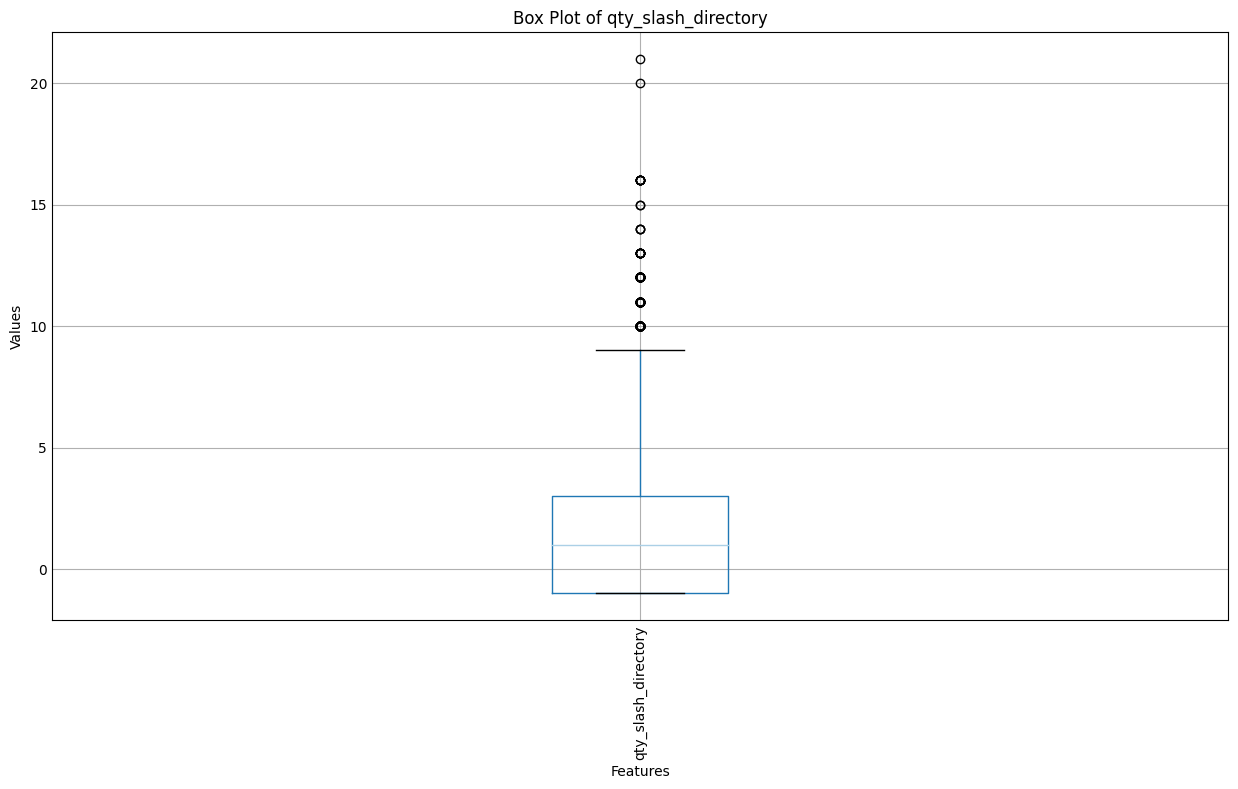

In [ ]:
selected_features = ['qty_slash_directory' ]

# Create a box plot for each feature
plt.figure(figsize=(12, 6))
data[selected_features].boxplot()
plt.title('Box Plot of qty_slash_directory')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

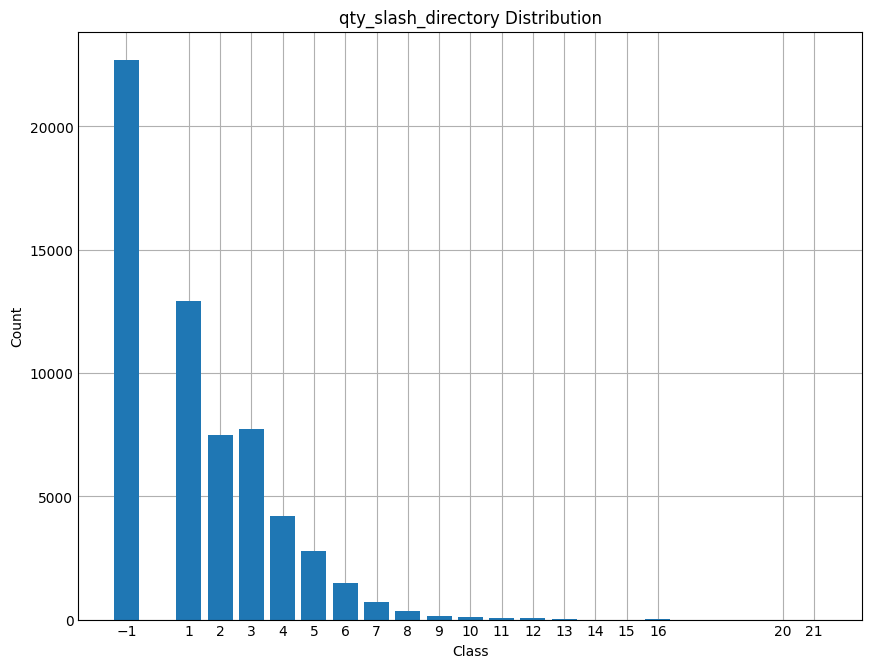

In [ ]:
# Count the occurrences of each class
class_counts = data['qty_slash_directory'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('qty_slash_directory Distribution')
plt.xticks(class_counts.index)
plt.show()

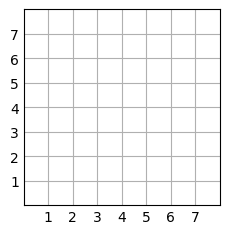

In [ ]:
plt.style.use('_mpl-gallery')
np.random.seed(60)
sample_size = 500
x = data.sample(n=sample_size)

y = data['phishing'].sample(n=sample_size, random_state=1)
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots()

ax.scatter(x.index, y.index, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()


In [ ]:
np.random.seed(0)
batch_size = 1500
n_clusters = len(data)
X, labels_true = make_blobs(n_samples=3000, centers=df, cluster_std=0.7)


In [ ]:
# Compute clustering with Means
from itertools import cycle
from time import time
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch, MiniBatchKMeans
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin


k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [ ]:
# Compute clustering with MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0


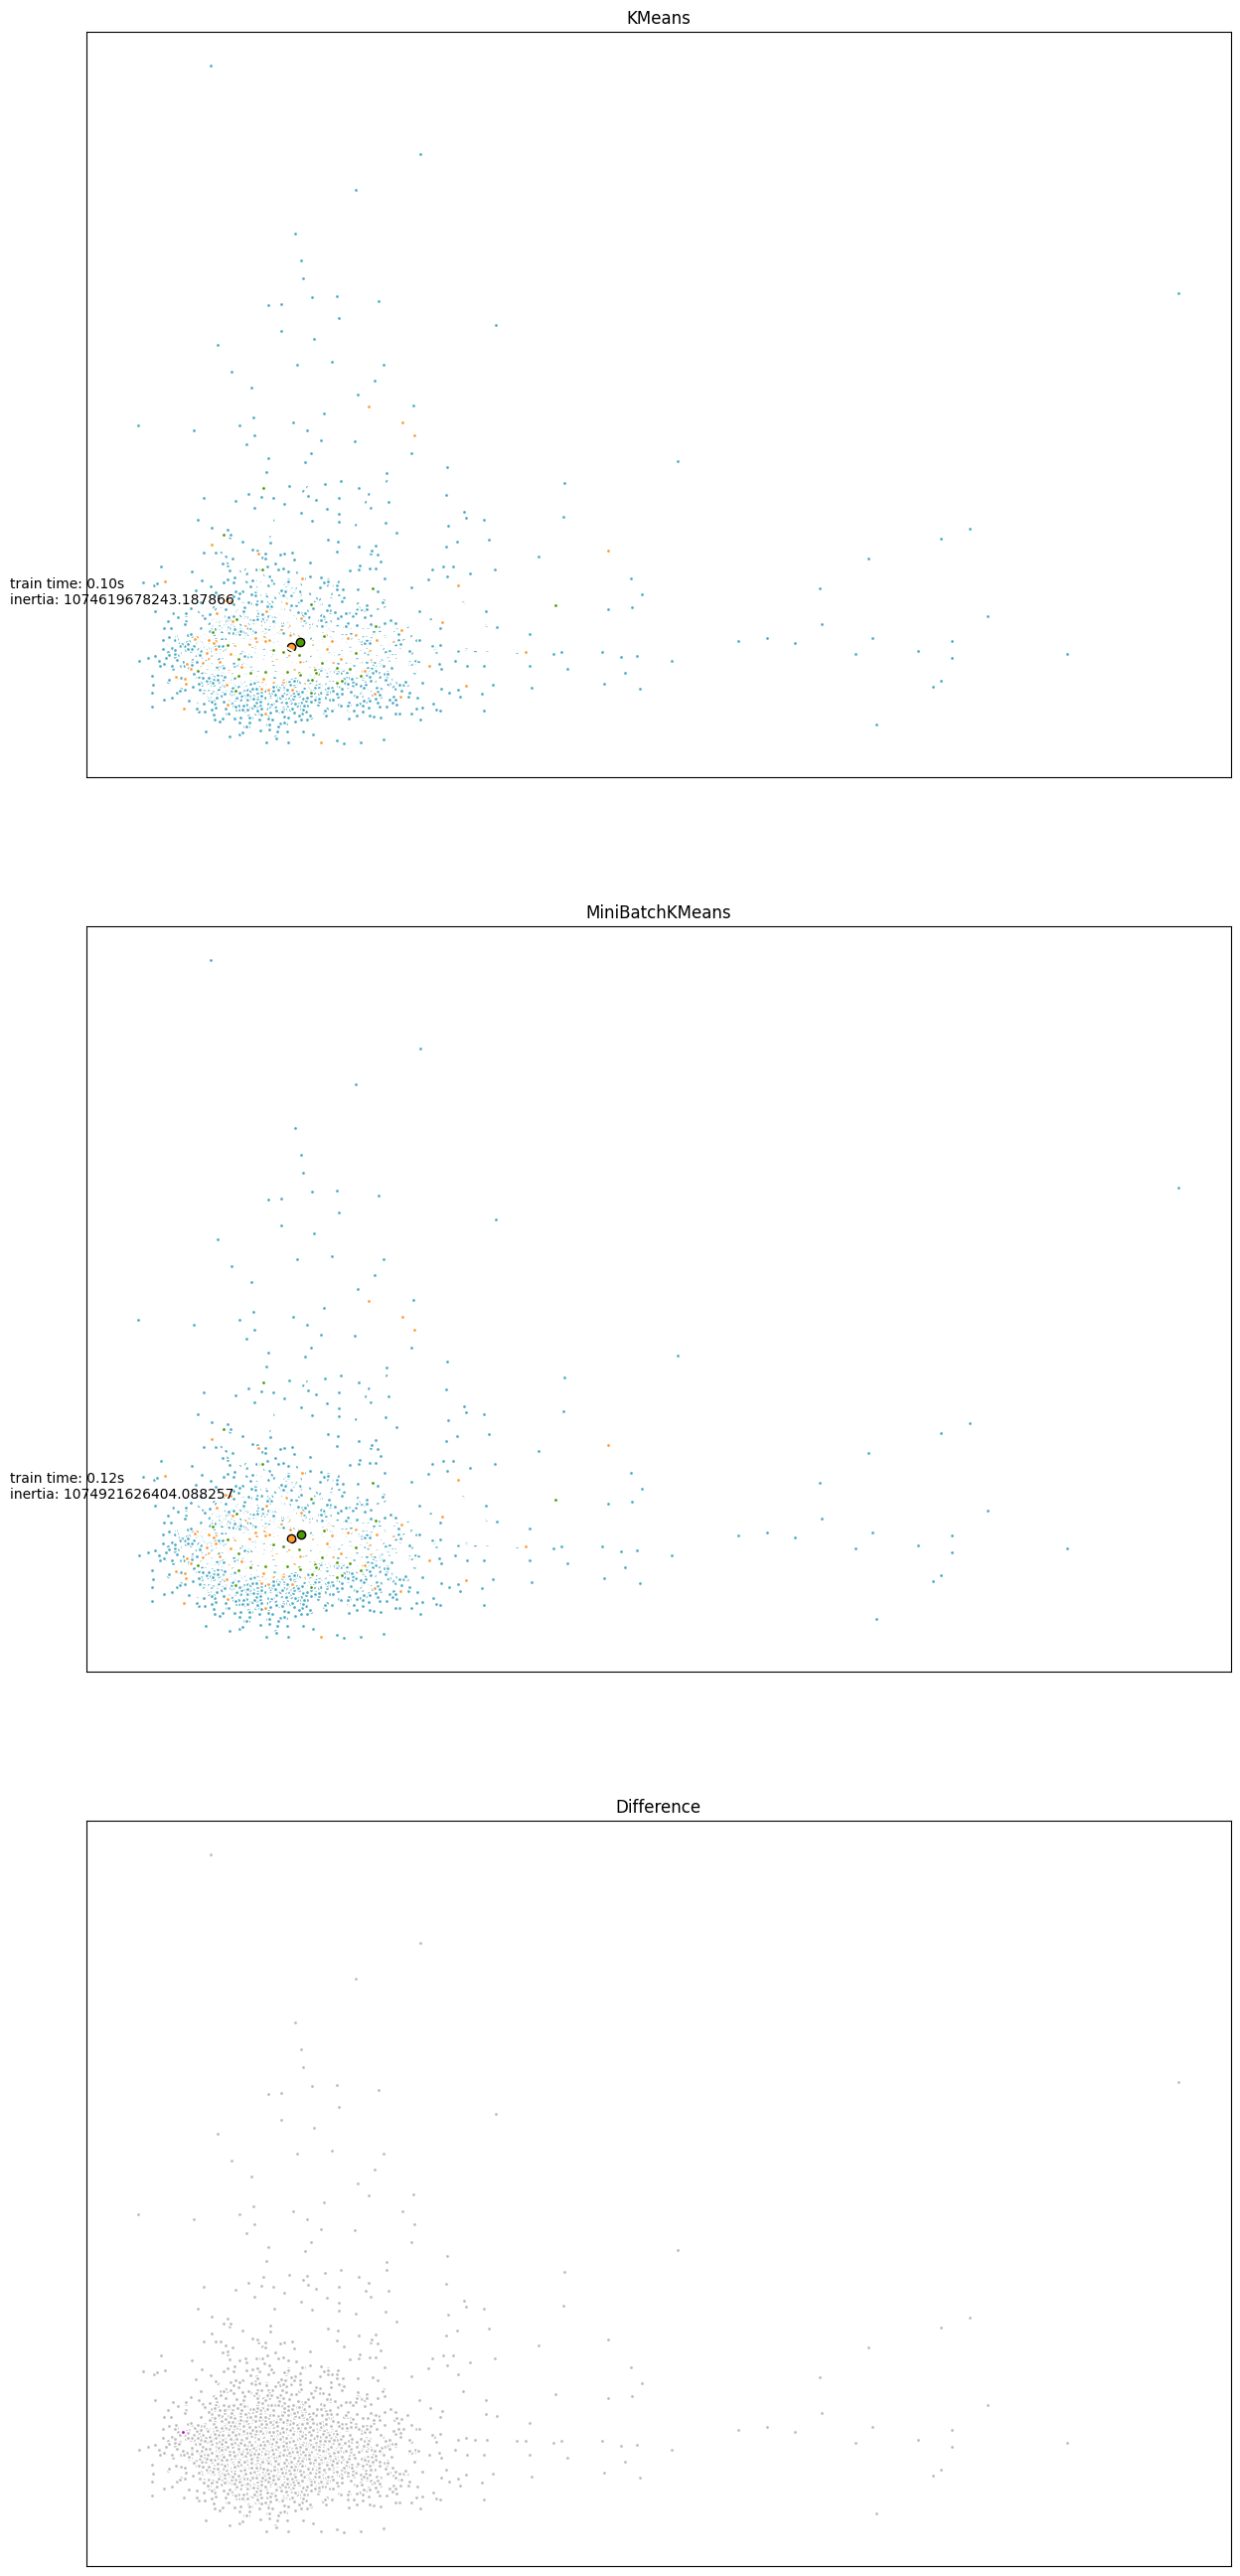

In [ ]:
fig = plt.figure(figsize=(12, 30))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)


ax = fig.add_subplot(3, 1, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))


ax = fig.add_subplot(3, 1, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))


ax = fig.add_subplot(3, 1, 3)

different = np.zeros_like(k_means_labels)

for k in range(len(k_means_cluster_centers)):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())
plt.show()


In [ ]:
from itertools import cycle
from time import time
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch, MiniBatchKMeans
xx = np.linspace(-22, 22, 10)
yy = np.linspace(-22, 22, 10)
xx, yy = np.meshgrid(xx, yy)
# Generate blobs to do a comparison between MiniBatchKMeans and Birch.
X, y = make_blobs(n_samples=100000, centers=data, random_state=0)


# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

In [ ]:
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with Birch with and without the final clustering step
# and plot.
birch_models = [Birch(threshold=1.7, n_clusters=None),
                Birch(threshold=1.7, n_clusters=100)]
final_step = ['without global clustering', 'with global clustering']


for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    time_ = time() - t
    print("Birch %s as the final step took %0.2f seconds" % (
          info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.plot(X[mask, 0], X[mask, 1], 'w',
                markerfacecolor=col, marker='.')
        if birch_model.n_clusters is None:
            ax.plot(this_centroid[0], this_centroid[1], '+', markerfacecolor=col,
                    markeredgecolor='k', markersize=5)
    ax.set_ylim([-25, 25])
    ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title('Birch %s' % info)

# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(init='k-means++', n_clusters=100, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)
t0 = time()
mbk.fit(X)
t_mini_batch = time() - t0
print("Time taken to run MiniBatchKMeans %0.2f seconds" % t_mini_batch)
mbk_means_labels_unique = np.unique(mbk.labels_)

ax = fig.add_subplot(1, 3, 3)
for this_centroid, k, col in zip(mbk.cluster_centers_,
                                 range(n_clusters), colors_):
    mask = mbk.labels_ == k
    ax.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(this_centroid[0], this_centroid[1], '+', markeredgecolor='k',
            markersize=5)
ax.set_xlim([-25, 25])
ax.set_ylim([-25, 25])
ax.set_title("MiniBatchKMeans")
ax.set_autoscaley_on(False)
plt.show()